In [3]:
% pylab inline

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
train = pd.read_csv('train_ysMSKmQ.csv')
test = pd.read_csv('test_uLBXQQR.csv')

In [7]:
# for simplicity, let us drop dteday variable
train = train.drop('dteday', axis=1)
test = test.drop('dteday', axis=1)

test_instants = test.instant

In [5]:
train.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A056588>]], dtype=object)

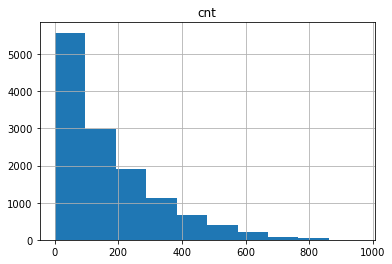

In [7]:
train.hist(column='cnt', )

In [15]:
# depending on boxplot, you divide dataset into three categories
train['temp_bins'] = pd.cut(train.temp, [0, 0.3, 0.7, 1], labels=['Low', 'Average', 'High'])
train['temp_bins']

0            Low
1            Low
2            Low
3            Low
4            Low
5            Low
6            Low
7            Low
8            Low
9        Average
10       Average
11       Average
12       Average
13       Average
14       Average
15       Average
16       Average
17       Average
18       Average
19       Average
20       Average
21       Average
22       Average
23       Average
24       Average
25       Average
26       Average
27       Average
28       Average
29       Average
          ...   
13005       High
13006       High
13007    Average
13008    Average
13009    Average
13010       High
13011       High
13012       High
13013       High
13014       High
13015       High
13016       High
13017       High
13018       High
13019       High
13020       High
13021       High
13022       High
13023       High
13024       High
13025       High
13026       High
13027       High
13028       High
13029       High
13030       High
13031       High
13032       Hi

In [11]:
# depending on barchart, you divide dataset into five categories
train['hr_bins'] = pd.cut(train.hr, [-1, 6, 9, 15, 20, 24], labels=['Late_Night', 'Office_Going', 'Mid_Day', 'Office_Returning', 'Night'])
train['hr_bins']

0              Late_Night
1              Late_Night
2              Late_Night
3              Late_Night
4              Late_Night
5              Late_Night
6              Late_Night
7            Office_Going
8            Office_Going
9            Office_Going
10                Mid_Day
11                Mid_Day
12                Mid_Day
13                Mid_Day
14                Mid_Day
15                Mid_Day
16       Office_Returning
17       Office_Returning
18       Office_Returning
19       Office_Returning
20       Office_Returning
21                  Night
22                  Night
23                  Night
24             Late_Night
25             Late_Night
26             Late_Night
27             Late_Night
28             Late_Night
29             Late_Night
               ...       
13005          Late_Night
13006          Late_Night
13007          Late_Night
13008          Late_Night
13009          Late_Night
13010        Office_Going
13011        Office_Going
13012       

In [13]:
train['weekend'] = ((train.holiday == 0) & (train.workingday == 0)).astype(int)

In [14]:
# here we have a categorical column "temp_bins" which we created previously. 
## We label encode this variable
from sklearn.preprocessing import LabelEncoder

In [16]:
# define label encoder
lb_temp = LabelEncoder()

# replace the temp bins column
train['temp_bins'] = lb_temp.fit_transform(train.temp_bins)

In [17]:
# define label encoder
lb_hr = LabelEncoder()

# replace the hr bins column
train['hr_bins'] = lb_hr.fit_transform(train.hr_bins)

In [13]:
df = pd.cut(train.atemp, [0, 0.3, 0.7, 1], labels=['atemp_low', 'atemp_avg', 'atemp_high'])
dummy = pd.get_dummies(df)
dummy

,atemp_low,atemp_avg,atemp_high
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,1,0


In [75]:
# append this to our train data
train = pd.concat([train, dummy], axis=1)

In [74]:
train = train.drop(['temp'], axis=1)


In [73]:
train = train.drop('instant', axis=1)

In [76]:
## According to my hypothesis, I selected these features
train = train[['season', 'hr', 'mnth', 'weekend', 'yr', 'weathersit', 'temp_bins', 
               'hum', 'windspeed', 'atemp', 'hr_bins', 'cnt']]

In [58]:
from sklearn.linear_model import LinearRegression

In [80]:
x=train.drop('cnt',axis=1)
y=train.cnt
#just for practice 
train.mnth.corr(train.season)

0.86065209411785715

In [23]:
#perform feature engineering on test
## We will do step 2 - step 4 now and later we will do step 1

# step 2

test['temp_bins']=pd.cut(test.temp,[0,0.3,0.7,1],labels=['low','average','high'])
test['hr_bins']=pd.cut(test.hr,[-1, 6, 9, 15, 20, 24],labels=['Late_Night', 'Office_Going', 'Mid_Day', 'Office_Returning', 'Night'])


In [33]:
#step 3

test['temp_bins'] = lb_temp.fit_transform(test.temp_bins)
test['hr_bins'] = lb_hr.fit_transform(test.hr_bins)

test.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,temp_bins,hr_bins
0,13036,3,1,7,8,0,1,1,1,0.76,0.6970,0.52,0.1940,1,3
1,13037,3,1,7,9,0,1,1,1,0.78,0.6970,0.46,0.2537,1,3
2,13038,3,1,7,10,0,1,1,1,0.80,0.7273,0.43,0.2537,1,1
3,13039,3,1,7,11,0,1,1,1,0.84,0.7273,0.28,0.2985,1,1
4,13040,3,1,7,12,0,1,1,1,0.84,0.7273,0.32,0.1940,1,1


In [35]:
df=pd.cut(test.atemp,[0,0.3,0.7,1],labels=['atemp_low','atemp_avg','atemp_high'])
dummy=pd.get_dummies(df)

In [47]:
pd.concat([test,dummy],axis=1)
test=pd.concat([test,dummy],axis=1)

test['weekend']=((test.workingday==0) & (test.holiday==0)).astype(int)

In [85]:
#step 5 
test = test[['season', 'hr', 'mnth', 'weekend', 'yr', 'weathersit', 'temp_bins', 
               'hum', 'windspeed', 'atemp', 'hr_bins',]]

In [84]:
x_test=test #assigning x_test, the predictor var values from test

In [83]:
print(x.columns,'\n', x_test.columns) #check if both predictor sets are aligned and in sync with each other

Index(['season', 'hr', 'mnth', 'weekend', 'yr', 'weathersit', 'temp_bins',
       'hum', 'windspeed', 'atemp', 'hr_bins'],
      dtype='object') 
 Index(['season', 'hr', 'mnth', 'weekend', 'yr', 'weathersit', 'temp_bins',
       'hum', 'windspeed', 'atemp', 'hr_bins'],
      dtype='object')


In [2]:
lin=LinearRegression()

NameError: name 'LinearRegression' is not defined

In [86]:
lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1]:
predictions=lin.predict(x_test)
lin.score(x,y)

NameError: name 'lin' is not defined

In [92]:
predictions=np.square(predictions)


In [94]:
submission_me=pd.DataFrame(data=[],columns=['instant','cnt'])
submission_me.instant=test_instants
submission_me.cnt=predictions

